In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [2]:
# Loading and preprocessing the image data
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [5]:
print(X_train.shape)


(60000, 28, 28)


In [7]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [9]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)

(0.0, 1.0)

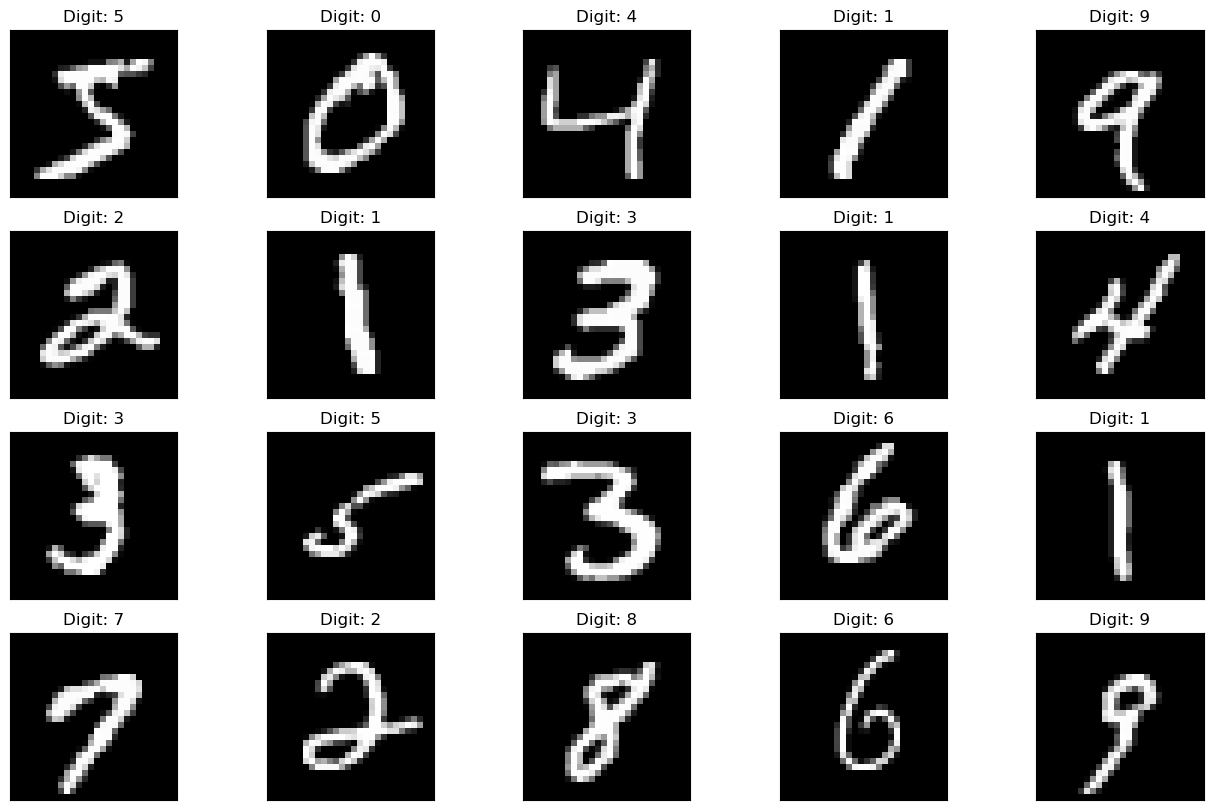

In [11]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i)
plt.show()


In [13]:
X_tarin = X_train.reshape((X_train.shape+ (1,)))
X_test = X_test.reshape((X_test.shape+(1,)))

In [15]:
y_train[0:20]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [17]:
# Defining the model's architecture
model = Sequential([
 Conv2D(32,(3,3), activation="relu",input_shape=(28,28,1)),
 MaxPooling2D((2,2)),
 Flatten(),
 Dense(100,activation="relu"),
 Dense(10,activation="softmax")
])


C:\Users\salve\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer,
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"]
)


In [21]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Training and testing the model
Model_log = model.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=15, 
    verbose=1  # Removed validation_data argument
)


Epoch 1/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8953 - loss: 0.3391
Epoch 2/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9826 - loss: 0.0546
Epoch 3/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9904 - loss: 0.0317
Epoch 4/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9931 - loss: 0.0210
Epoch 5/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9960 - loss: 0.0133
Epoch 6/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9968 - loss: 0.0100
Epoch 7/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9990 - loss: 0.0040
Epoch 8/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9988 - loss: 0.0039
Epoch 9/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9995 - loss: 0.0026
Epoch 10/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9998 - loss: 0.0011


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


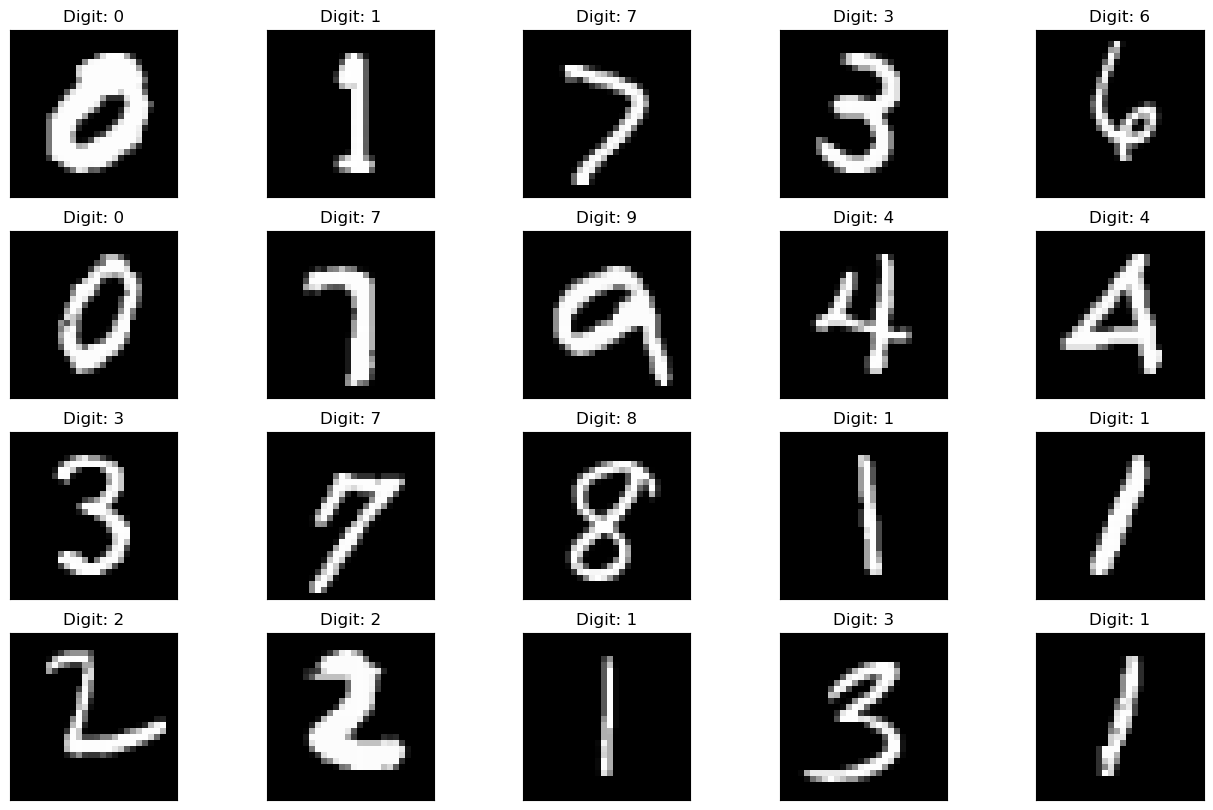

In [25]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()

In [27]:
predictions = np.argmax(model.predict(X_test),axis=-1)
accuracy_score(y_test,predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0.9902

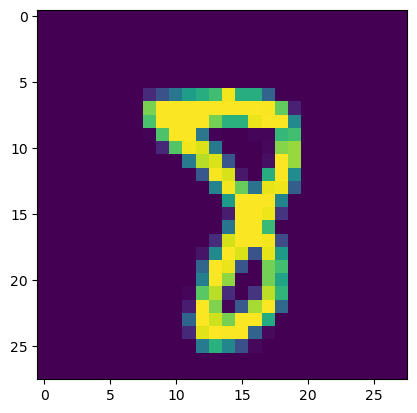

In [29]:
n = random.randint(0,9999)
plt.imshow(X_test[n])
plt.show()

In [31]:
predicted_value = model.predict(X_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Handwritten number in the image is = 8


In [33]:
# Estimating the model's performance
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss:' , score[0])
print('Testaccuracy:',score[1])

Test loss: 0.039388418197631836
Testaccuracy: 0.9901999831199646
